In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode

data=pd.read_csv('weatherAUS.csv')
#Mapping rain values as binary
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0,})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0,})

#Dropping wind direction values
data=data.drop(columns=['WindGustDir'])
data=data.drop(columns=['WindDir9am'])
data=data.drop(columns=['WindDir3pm'])




#Filling in null values
data.MinTemp=data.MinTemp.fillna(data.MinTemp.median())
data.MaxTemp=data.MaxTemp.fillna(data.MaxTemp.median())
data.Rainfall=data.Rainfall.fillna(data.Rainfall.median())
data.Evaporation=data.Evaporation.fillna(data.Evaporation.median())
data.Sunshine=data.Sunshine.fillna(data.Sunshine.median())
data.WindGustSpeed=data.WindGustSpeed.fillna(data.WindGustSpeed.median())
data.WindSpeed9am=data.WindSpeed9am.fillna(data.WindSpeed9am.median())
data.WindSpeed3pm=data.WindSpeed3pm.fillna(data.WindSpeed3pm.median())
data.Humidity9am=data.Humidity9am.fillna(data.Humidity9am.median())
data.Humidity3pm=data.Humidity3pm.fillna(data.Humidity3pm.median())
data.Pressure9am=data.Pressure9am.fillna(data.Pressure9am.median())
data.Pressure3pm=data.Pressure3pm.fillna(data.Pressure3pm.median())
data.Cloud9am=data.Cloud9am.fillna(data.Cloud9am.median())
data.Cloud3pm=data.Cloud3pm.fillna(data.Cloud3pm.median())
data.Temp9am=data.Temp9am.fillna(data.Temp9am.median())
data.Temp3pm=data.Temp3pm.fillna(data.Temp3pm.median())
data.RainToday=data.RainToday.fillna(data.RainToday.median())
data.RainTomorrow=data.RainTomorrow.fillna(data.RainTomorrow.median())


data[["Year", "Month", "Day"]] = data["Date"].str.split("-", expand = True)

In [67]:
X = data.iloc[:,2:19].to_numpy()
one=[[1]]
count=1
for i in range(1, len(data)):
    if(data['Location'][i]==data['Location'][i-1]):
        one.append([count])
    else:
        count=count+1
        one.append([count])
X = np.concatenate((X,one),axis=1)
X = np.concatenate((X,data.iloc[:,20:23]),axis=1)
one = np.ones([X.shape[0],1])
X = np.concatenate((one,X),axis=1)

#taking y and theta array
y = data.iloc[:,19:20].to_numpy()
m = len(y)
coef = np.zeros([1,22])

X[ :,19:22]=X[ :,19:22].astype(int)
X=X.astype(float)
X=(X-X.mean())/X.std()

#shuffling the order
X = np.concatenate((X,y),axis=1)
np.random.shuffle(X)  
y =(X[ :, 22:23])
X = np.delete(X, 22, axis=1)

trainx, testx=np.vsplit(X, 2)
trainy, testy=np.vsplit(y, 2)
m=m/2

#hyperparameters
alpha=0.01
it=200

In [68]:
def hypo(x,c):
    temp = -x @ c.T
    return 1/(1+ np.exp(temp))

def costfunction(X,y, coef):
        return -(1/m)*np.sum(y*np.log(hypo(X,coef)) + (1-y)*np.log(1-hypo(X,coef)))
    
def descentfunction(X,y,coef, alpha, it):
    cost=np.zeros(it)
    
    for i in range (it):
        coef = coef - (alpha/m) * np.sum((hypo(X,coef) - y) * X, axis = 0)
        cost[i]=costfunction(X,y, coef)
    return coef, cost

gradient, cost = descentfunction(trainx,trainy, coef, alpha, it)

finalcost = costfunction(testx,testy, gradient)
print (finalcost)

0.5274908222258629


Text(0, 0.5, 'Cost')

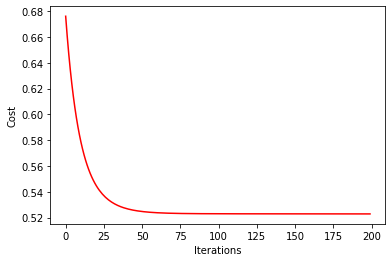

In [69]:
fig, ax = plt.subplots()  
ax.plot(np.arange(it), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

In [70]:
#accuracy

count = 0;
for i in range (72729):
    temp = 0.0
    if((testx[i,:] @ gradient.T)>0.5):
        temp = 1.0
    if(temp == testy[i,0]):
        count=count+1

    
accuracy = (count/72730.0)*100
print("Accuracy:",accuracy,"%")

Accuracy: 77.90182868142445 %
